In [1]:
import pandas as pd
import yaml
from pathlib import Path

config_path = Path("../config.yaml")

with open(config_path, "r") as f:
    config = yaml.safe_load(f)

csv_relative_path = config["data"]["raw_data_csv"]["raw_data"]

csv_path = config_path.parent / csv_relative_path

df = pd.read_csv(csv_path)
df

name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage   engine  \
0     Individual       Manual           First Owner   23.4 kmpl  1248 CC   
1     Individual       Manual          Second Owner  21.14 kmpl  1498 CC   
2     Individual       Manual           Third Owner   17.7 kmpl  1497 CC   
3     Individual       Manual           First Owner   23.0 kmpl  1396 CC   
4     Individual       Manual           First Owner   16.1 kmpl  1298 CC   
...          ...          ...                   ...         ...      ...   
8123  Individual       Manual           First Owner   18.5 kmpl  1197 CC   
8124  Individual       Manual  Fourth & Above Owner   16.8 kmpl  1493 CC   
8125  Individual       Manual           First Owner   19.3 kmpl  1248 CC   
8126  Individual       Manual           First Owner  23.57 kmpl  1396 CC   
8127  Individual       Manual           First Owner  23.57 kmpl  1396 CC   

       max_power                     torque  seats  
0         74 bhp             190Nm@ 2000rpm    5.0  
1     103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2         78 bhp      12.7@ 2,700(kgm@ rpm)    5.0  
3         90 bhp   22.4 kgm at 1750-2750rpm    5.0  
4       88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
...          ...                        ...    ...  
8123   82.85 bhp           113.7Nm@ 4000rpm    5.0  
8124     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
8125    73.9 bhp             190Nm@ 2000rpm    5.0  
8126      70 bhp        140Nm@ 1800-3000rpm    5.0  
8127      70 bhp        140Nm@ 1800-3000rpm    5.0  

[8128 rows x 13 columns]

In [2]:
#https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+details+v4.csv

In [3]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(df[['fuel', 'seller_type', 'transmission']])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['fuel', 'seller_type', 'transmission']))
df = pd.concat([df.drop(['fuel', 'seller_type', 'transmission'], axis=1), encoded_df], axis=1)

In [4]:
df['brand'] = df['name'].str.split().str[0]
df.drop('name', axis=1, inplace=True)


encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(df[['brand']])

#Create new DataFrame with encoded brand columns
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['brand']), index=df.index)

#Concatenate encoded columns back to original df
df = pd.concat([df.drop('brand', axis=1), encoded_df], axis=1)


In [5]:
df['car_age'] = 2025 - df['year']
df.drop('year', axis=1, inplace=True)

In [6]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [7]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car']])
df[['owner']] = encoder.fit_transform(df[['owner']])

In [8]:
df['mileage'].unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', nan, '18.9 kmpl',
       '18.15 kmpl', '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl',
       '25.5 kmpl', '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl',
       '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl',
       '18.6 kmpl', '33.44 km/kg', '23.95 kmpl', '17.0 kmpl',
       '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl',
       '12.55 kmpl', '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl',
       '20.65 kmpl', '27.3 kmpl', '11.36 kmpl', '17.68 kmpl',
       '14.28 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81 kmpl'

In [9]:
#df['mileage'] = df['mileage'].str.replace(' kmpl', '', regex=False).astype(float)
df['mileage'] = df['mileage'].str.extract(r'([\d.]+)').astype(float)

In [10]:
df['engine'] = df['engine'].str.replace(' CC', '', regex=False).astype(float)

In [11]:
df['max_power'].unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp',
       '88.5 bhp', '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp',
       '88.8 bhp', '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp',
       '34.2 bhp', '35 bhp', '81.83 bhp', '40.3 bhp', '121.3 bhp',
       '138.03 bhp', '160.77 bhp', '117.3 bhp', '116.3 bhp', '83.14 bhp',
       '67.05 bhp', '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp',
       '175.56 bhp', '103.25 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp',
       '187.74 bhp', '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp',
       '108.495 bhp', '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp',
       '189 bhp', '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp',
       '81.80 bhp', '73 bhp', '120 bhp', '94.68 bhp', '160 bhp', '65 bhp',
       '155 bhp', '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.8 bhp',
       '126.2 bhp', '98.

In [12]:
#df['max_power'] = df['max_power'].str.replace(' bhp', '', regex=False).astype(float)
df['max_power'] = pd.to_numeric(df['max_power'].str.replace(' bhp', '', regex=False), errors='coerce')

# Fill NaN with the mean value
df['max_power'] = df['max_power'].fillna(df['max_power'].mean())

In [13]:
import re

# Extract numeric torque value
df['torque'] = df['torque'].str.extract(r'([\d.]+)').astype(float)

In [14]:
df.dtypes

selling_price                     int64
km_driven                         int64
owner                           float64
mileage                         float64
engine                          float64
max_power                       float64
torque                          float64
seats                           float64
fuel_Diesel                     float64
fuel_LPG                        float64
fuel_Petrol                     float64
seller_type_Individual          float64
seller_type_Trustmark Dealer    float64
transmission_Manual             float64
brand_Ashok                     float64
brand_Audi                      float64
brand_BMW                       float64
brand_Chevrolet                 float64
brand_Daewoo                    float64
brand_Datsun                    float64
brand_Fiat                      float64
brand_Force                     float64
brand_Ford                      float64
brand_Honda                     float64
brand_Hyundai                   float64


In [15]:
#clean_relative_path = config["data"]["clean_data_csv"]["clean_data"]
#clean_csv_path = config_path.parent / clean_relative_path

# Ensure the directory exists
#clean_csv_path.parent.mkdir(parents=True, exist_ok=True)

# Save the cleaned DataFrame
#df.to_csv(clean_csv_path, index=False)

In [16]:
df.isnull().sum()

selling_price                     0
km_driven                         0
owner                             0
mileage                         221
engine                          221
max_power                         0
torque                          222
seats                           221
fuel_Diesel                       0
fuel_LPG                          0
fuel_Petrol                       0
seller_type_Individual            0
seller_type_Trustmark Dealer      0
transmission_Manual               0
brand_Ashok                       0
brand_Audi                        0
brand_BMW                         0
brand_Chevrolet                   0
brand_Daewoo                      0
brand_Datsun                      0
brand_Fiat                        0
brand_Force                       0
brand_Ford                        0
brand_Honda                       0
brand_Hyundai                     0
brand_Isuzu                       0
brand_Jaguar                      0
brand_Jeep                  

In [17]:
df = df.dropna(axis=0, how='any')

In [18]:
df.isnull().sum()

selling_price                   0
km_driven                       0
owner                           0
mileage                         0
engine                          0
max_power                       0
torque                          0
seats                           0
fuel_Diesel                     0
fuel_LPG                        0
fuel_Petrol                     0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission_Manual             0
brand_Ashok                     0
brand_Audi                      0
brand_BMW                       0
brand_Chevrolet                 0
brand_Daewoo                    0
brand_Datsun                    0
brand_Fiat                      0
brand_Force                     0
brand_Ford                      0
brand_Honda                     0
brand_Hyundai                   0
brand_Isuzu                     0
brand_Jaguar                    0
brand_Jeep                      0
brand_Kia                       0
brand_Land    

In [19]:
df.shape


(7906, 46)

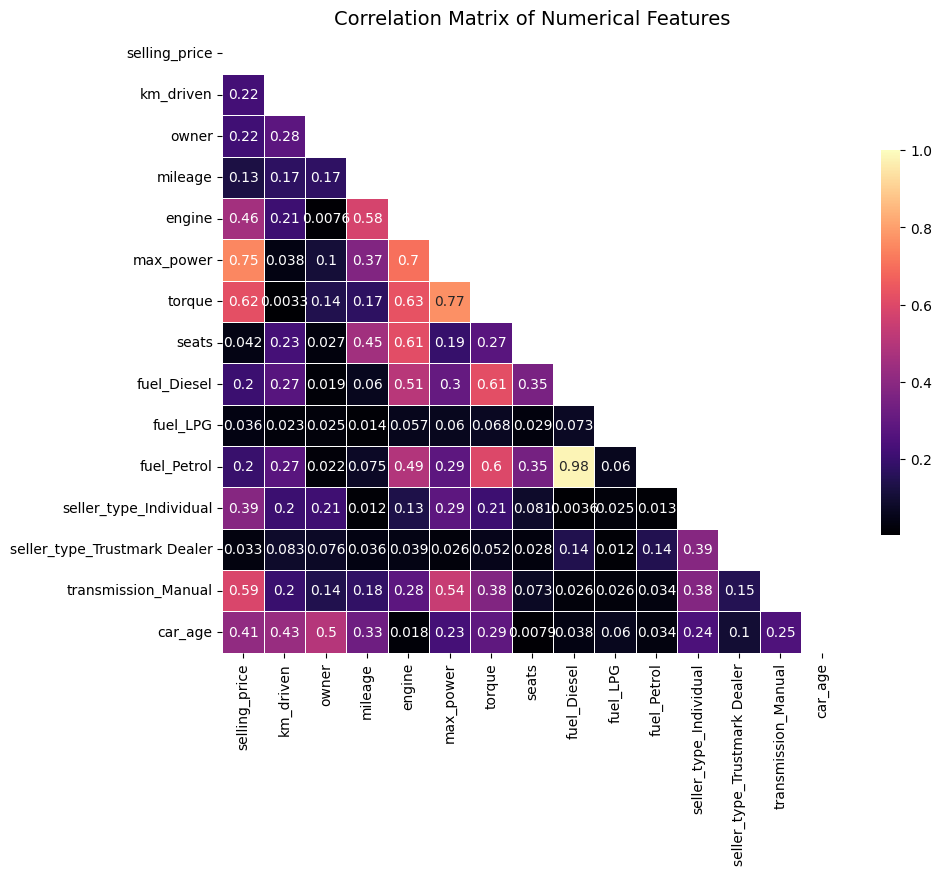

In [20]:
# === FEATURE SELECTION - CORRELATION ANALYSIS ===
# We analyze the correlation between numerical variables 
# to identify the most relevant features for predicting the selling price.

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Drop brand dummy columns to simplify visualization
df_corr = df.copy()
df_corr = df_corr.drop(columns=[
    'brand_Ashok','brand_Audi','brand_BMW','brand_Chevrolet','brand_Daewoo',
    'brand_Datsun','brand_Fiat','brand_Force','brand_Ford','brand_Honda',
    'brand_Hyundai','brand_Isuzu','brand_Jaguar','brand_Jeep','brand_Kia',
    'brand_Land','brand_Lexus','brand_MG','brand_Mahindra','brand_Maruti',
    'brand_Mercedes-Benz','brand_Mitsubishi','brand_Nissan','brand_Opel',
    'brand_Peugeot','brand_Renault','brand_Skoda','brand_Tata','brand_Toyota',
    'brand_Volkswagen','brand_Volvo'
])

# Calculate the absolute correlation matrix
corr = np.abs(df_corr.corr())

# Create a mask for the upper triangle (to avoid duplicate values)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, mask=mask, cmap='magma', vmax=1, square=True, linewidths=.5,
            annot=True, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.show()


Insights:

-max_power and torque show the strongest positive correlation with selling_price.

-engine and car_age are moderately correlated.

-Some features like mileage and seats have weak correlation and might be less relevant.

This analysis helps identify which features may have the greatest influence on the car price.

In [21]:
clean_relative_path = config["data"]["clean_data_csv"]["clean_data"]
clean_csv_path = config_path.parent / clean_relative_path

# Ensure the directory exists
clean_csv_path.parent.mkdir(parents=True, exist_ok=True)

# Save the cleaned DataFrame
df.to_csv(clean_csv_path, index=False)

In [22]:
df = pd.read_csv("../data/clean_data_csv/clean_data.csv")
print(df.shape)


(7906, 46)
